# JN-pipeline - Cell segmentation

## Import packages

In [62]:
import getpass

import ezomero
from skimage.io import imread
from skimage import filters
from matplotlib import pyplot as plt
from microfilm.microplot import microshow
from skimage.measure import label
from pyclesperanto_prototype import imshow

import pyclesperanto_prototype as cle

## Set Parameters

In [ ]:
OMEROUSER = input(f"Enter username: \t")
OMEROPASS = getpass.getpass(prompt = f"Enter password: \t")

OMEROHOST = ""
OMEROPORT = ""
OMEROWEB = ""

## Connect to OMERO

In [ ]:
# Connection Check:
conn=ezomero.connect(OMEROUSER, OMEROPASS, "", host=OMEROHOST, port=OMEROPORT, secure=True)

print(conn.isConnected())
user = conn.getUser()
print("Current user:")
print("   ID:", user.getId())
print("   Username:", user.getName())
print("   Full Name:", user.getFullName())

## Get your Image from OMERO

## Browse your dataset

In [ ]:
# Load first 5 Projects, filtering by default group and owner
my_exp_id = conn.getUser().getId()
default_group_id = conn.getEventContext().groupId
for project in conn.getObjects("Project", opts={'owner': my_exp_id,
                                            'group': default_group_id,
                                            'order_by': 'lower(obj.name)',
                                            'limit': 5, 'offset': 0}):
    print_obj(project)
    # We can get Datasets with listChildren, since we have the Project already.
    # Or conn.getObjects("Dataset", opts={'project', id}) if we have Project ID
    for dataset in project.listChildren():
        print_obj(dataset, 2)
        for image in dataset.listChildren():
            print_obj(image, 4)

## Select your image

In [ ]:
img = conn.getObject("Image", image_id)

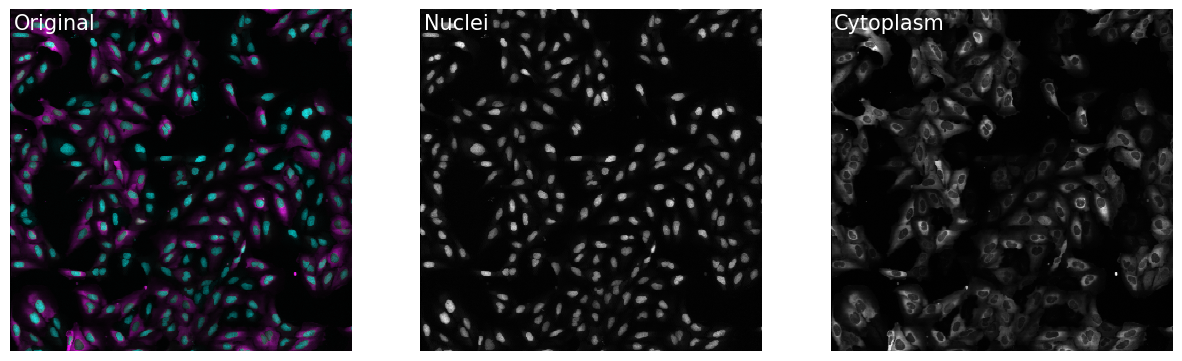

In [2]:
img = imread("/home/massei/Documents/03_Courses/03_My_Courses/2024-jn-omero-pipeline/02_jupyter_notebook/01_data/cell_img.ome.tif")
nuclei = img[0,:,:]
cyto = img[1,:,:]

fig, axs = plt.subplots(1,3, figsize=(15,15))

microshow(img, ax=axs[0], label_text='Original', label_color='white')
microshow(nuclei, ax=axs[1], label_text='Nuclei', label_color='white')
microshow(cyto, ax=axs[2], label_text='Cytoplasm', label_color='white')

## Denoising

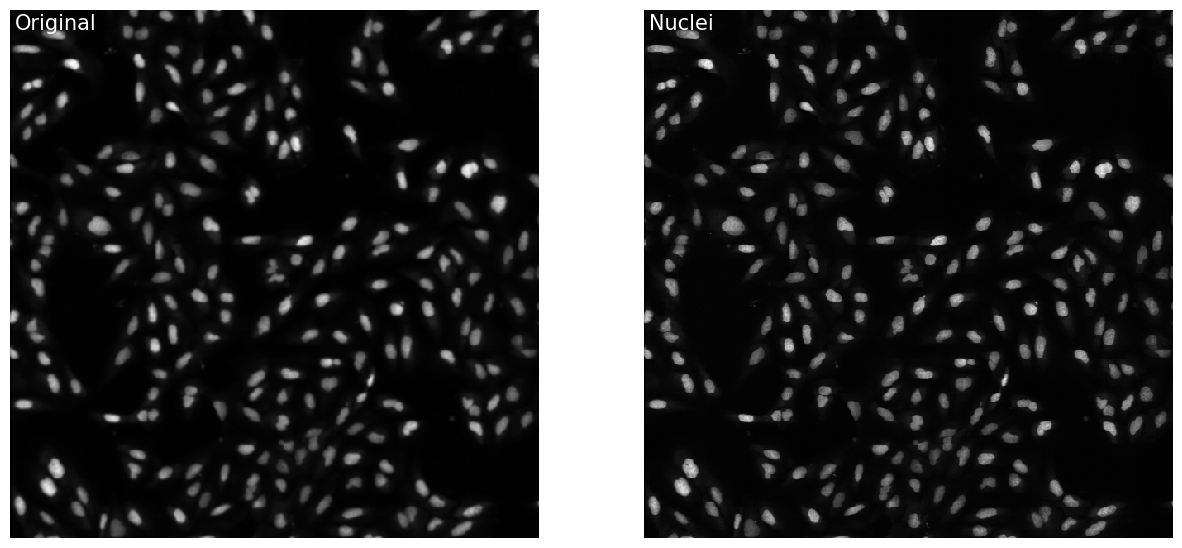

In [26]:
gaussian_filtered = filters.gaussian(nuclei, sigma=1)

fig, axs = plt.subplots(1,2, figsize=(15,15))

microshow(gaussian_filtered, ax=axs[0], label_text='Original', label_color='white')
microshow(nuclei, ax=axs[1], label_text='Nuclei', label_color='white')

## Binarization

In [27]:
threshold = filters.threshold_otsu(gaussian_filtered)
print(threshold)

0.21228713476250938


In [63]:
binary_image = gaussian_filtered >= threshold
labeled_blobs = label(binary_image)
fig, axs = plt.subplots(1,2, figsize=(15,15))

microshow(gaussian_filtered, ax=axs[0], label_text='Original', label_color='white')
microshow(labeled_blobs, ax=axs[1], label_text='Nuclei', label_color='white', alpha=0.5)



LogicError: clGetPlatformIDs failed: PLATFORM_NOT_FOUND_KHR

## Statistics using Scikit-image

## Push back to OMERO

## Looping pipeline!!!